In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt

### 1 задача

In [2]:
url = 'https://cbr.ru/'
response = requests.get(url)

#проверка статуса
if response.status_code == 200:

    #получение ссылки на валюты
    tree = BeautifulSoup(response.content, 'html.parser')
    #поиск инфы на сайте цб
    ex=tree.find_all('div', {'class': 'col-md-2 col-xs-7 _right'})
    
    #ссылка на текущую дату
    date_all = ex[0].a['href']
    
    #поллучение списка всех валют
    response_date = requests.get(url+date_all)
    tree_all = BeautifulSoup(response_date.content, 'html.parser')
    table_course = tree_all.find_all('table',{'class':'data'})
    
    #находим значение доллара на текущий день
    for i in table_course[0].find_all('tr')[1:]:
        if i.td.text == '840':
            usd = i.find_all('td')[-1].text
            usd = float(usd.replace(',','.'))
    print('Код сервера: ',response.status_code )
    
else:
    print('сервер выдал ошибку: ', response.status_code)
    usd=93

print('Курс доллара сегодня:', usd)

Код сервера:  200
Курс доллара сегодня: 92.7519


In [3]:
df = pd.DataFrame({'goods':np.arange(0,100,1), 'price_usd':np.arange(10,1001,10)})

In [4]:
df['accessories'] = df['goods'].apply(lambda x: 'accessories_' + str(x))

In [5]:
df =df.drop('goods', axis=1)[['accessories','price_usd']]

In [6]:
df['price_rub'] = df['price_usd']*usd

In [7]:
df


,accessories,price_usd,price_rub
0,accessories_0,10,927.519
1,accessories_1,20,1855.038
2,accessories_2,30,2782.557
3,accessories_3,40,3710.076
4,accessories_4,50,4637.595
...,...,...,...
95,accessories_95,960,89041.824
96,accessories_96,970,89969.343
97,accessories_97,980,90896.862
98,accessories_98,990,91824.381


In [8]:
#функция для распредления скидки
def end_price(x):
    if x >=50000:
        return x*0.8
    if x >=10000:
        return x*0.9
    if x >=5000:
        return x*0.95
    if x >=1000:
        return x*0.98
    return x

In [9]:
df['price_w_discount'] = df['price_rub'].apply(end_price)

In [10]:
df

,accessories,price_usd,price_rub,price_w_discount
0,accessories_0,10,927.519,927.51900
1,accessories_1,20,1855.038,1817.93724
2,accessories_2,30,2782.557,2726.90586
3,accessories_3,40,3710.076,3635.87448
4,accessories_4,50,4637.595,4544.84310
...,...,...,...,...
95,accessories_95,960,89041.824,71233.45920
96,accessories_96,970,89969.343,71975.47440
97,accessories_97,980,90896.862,72717.48960
98,accessories_98,990,91824.381,73459.50480


### 2 задача

In [11]:
# в человеках
grandma = 40

#в секундах
mean_service = 60

# время первой баб. в секундах
first_grandma = 9*60 + 15

#шаг времени следующе баб.
step = 10

In [12]:
df_2 = pd.DataFrame({'grandma':np.arange(1,41,1), 'time':np.full(40, np.arange(first_grandma,0,-step)[:40])})

In [13]:
df_2.head()

,grandma,time
0,1,555
1,2,545
2,3,535
3,4,525
4,5,515


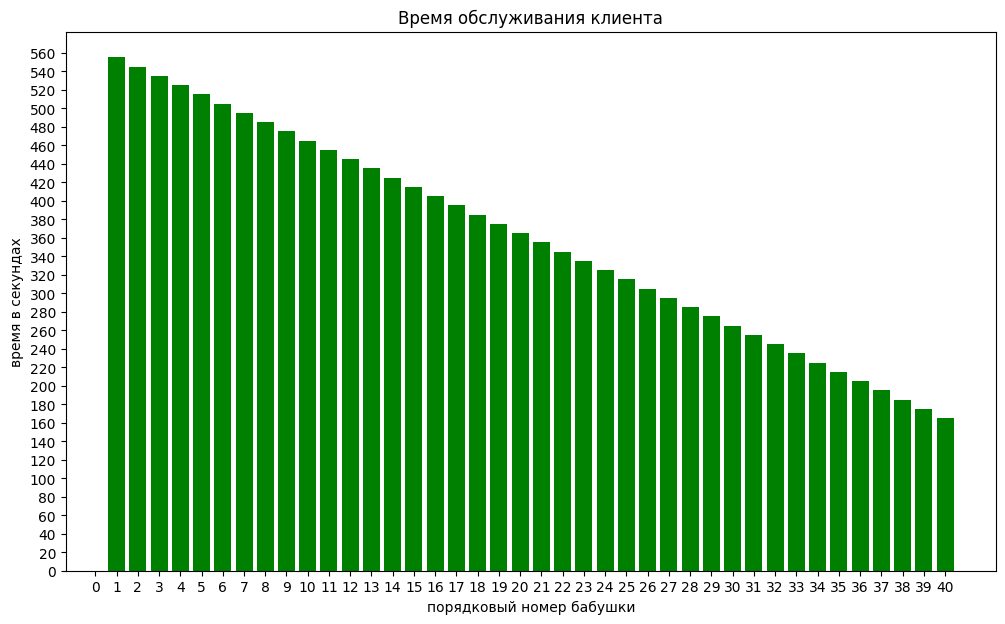

In [14]:
fig = plt.figure()

fig.set_size_inches(12, 7)

plt.bar(df_2['grandma'], df_2['time'], color='green')


plt.title('Время обслуживания клиента')
plt.yticks(np.arange(0, 565, step=20))
plt.xticks(np.arange(0, 41, step=1))
plt.xlabel('порядковый номер бабушки')
plt.ylabel('время в секундах')
plt.show()

In [15]:
time_total = sum(df_2['time'])/60/60
print(f'Кассир обслуживала {time_total} часа')

Кассир обслуживала 4.0 часа


### 3 задача

На заводе "Прогресс" каждому сотруднику зарплату за месяц выдают дважды: сначала часть оклада в виде аванса, а по истечении месяца - остальную часть оклада. 
При этом при окончательном расчете удерживают также подоходный и пенсионный налоги и профсоюзный взнос. 
Цель исследования: 
 По известному окладу одного сотрудника произвести расчет выплаты зарплаты в конце месяца, если известно:
 - аванс составляет 40% от оклада;
 - подоходный налог составляет 13% от величины  оклад минус пенсионный налог.
 - профсоюзный взнос и пенсионный налог составляют по 1% от оклада.

создадим пример таблицы

In [16]:
df_3 = pd.DataFrame({'number_employee':np.arange(1,41,1), 'salary':np.full(40, np.arange(50000,150000,2500)[:40])})

In [17]:
# рассчитаем аванс
df_3['prepayment'] = df_3['salary']*0.4
# рассчитаем величину оклада после налогоблажения сначала считаем оклад минус проф взнос и пенс налог - вместе 2%,
#затем подоходный налог от суммы, которая получилась.
df_3['salary_after_tax'] = (df_3['salary']*0.98)*0.87

#  посчитаем итоговую зарплату в конце мсеяца
df_3['salary_end_month'] = df_3['salary_after_tax'] - df_3['prepayment']

salary_end_month показывает сумму оклада в конце мсеяца для каждого сотрудника.

In [18]:
df_3.head()

,number_employee,salary,prepayment,salary_after_tax,salary_end_month
0,1,50000,20000.0,42630.0,22630.0
1,2,52500,21000.0,44761.5,23761.5
2,3,55000,22000.0,46893.0,24893.0
3,4,57500,23000.0,49024.5,26024.5
4,5,60000,24000.0,51156.0,27156.0


### 4 задача

Спланируйте расходы на бензин для ежедневных поездок из п. Половинка в г. Урай на автомобиле. Если известно:
 - расстояние м/д населёнными пунктами в км. (30 км. в одну сторону)
 - расход бензина (8 литров на 100 км.) 
 - количество поездок в месяц разное (т.к. разное количество рабочих дней.)
 - цена 1 литра бензина ( n рублей за литр.)
 - ежемесячный прогнозируемый рост цены на бензин - k% в месяц
 Рассчитайте ежемесячный   и годовой расход на бензин. Постройте график изменения цены бензина и график ежемесячных расходов.

In [19]:
pip install holidays 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import datetime
import calendar
import holidays

In [21]:
# праздники и выходные
no_work_days = []

In [22]:
df_4 = pd.DataFrame({'date':pd.date_range(start='21/02/2024', end='21/02/2025')})

In [23]:
df_4.head()

,date
0,2024-02-21
1,2024-02-22
2,2024-02-23
3,2024-02-24
4,2024-02-25


In [24]:
#добавим праздники
for year in [2024,2025]:
    for p in holidays.RU(years = year).items(): 
        no_work_days.append(p[0])
#преобразуем тип даты
no_work_days=pd.to_datetime(no_work_days)

In [25]:
def work_days(x):
    ###возвращает 1, если день рабочий , 0 если выходной
    if (calendar.weekday(x.year,x.month,x.day) == 5) or\
        (calendar.weekday(x.year,x.month,x.day) == 6):
        return 0
    if x in no_work_days:
        return 0
    return 1

In [26]:
#добавим выходные
df_4['work_day'] = df_4['date'].apply(work_days)

In [27]:
df_4['month'] = df_4['date'].dt.month
df_4['year'] = df_4['date'].dt.year

In [28]:
def sum_of_expenses(df, n=50, k=2):
    ### сумму за литр - n, k- процент роста

    if df['work_day'] == 0:
        return 0

    #кол-во мсеяцев с 1 даты
    count_m = (df['date'].year - df_4['date'][0].year)*12 + df['date'].month - df_4['date'][0].month
    #нарастающая сумма в зав-ти от месяца
    for i in range(count_m):
        n=n*((k+100)/100)

    return (30/(100/8))*n

In [29]:
def gas_of_expenses(df, n=50, k=2):
    ### сумму за литр - n, k- процент роста

    #кол-во мсеяцев с 1 даты
    count_m = (df['date'].year - df_4['date'][0].year)*12 + df['date'].month - df_4['date'][0].month
    #нарастающая сумма в зав-ти от месяца
    for i in range(count_m):
        n=n*((k+100)/100)

    return round(n,2)

In [30]:
df_4['gas_1l_price'] = df_4.apply(gas_of_expenses, axis=1)

In [31]:
df_4.head()

,date,work_day,month,year,gas_1l_price
0,2024-02-21,1,2,2024,50.0
1,2024-02-22,1,2,2024,50.0
2,2024-02-23,0,2,2024,50.0
3,2024-02-24,0,2,2024,50.0
4,2024-02-25,0,2,2024,50.0


In [32]:
df_4['expenses'] = df_4.apply(sum_of_expenses, axis=1)

In [33]:
df_4['expenses'] = round(df_4['expenses'],2)

In [34]:
df_4.tail()

,date,work_day,month,year,gas_1l_price,expenses
362,2025-02-17,1,2,2025,63.41,152.19
363,2025-02-18,1,2,2025,63.41,152.19
364,2025-02-19,1,2,2025,63.41,152.19
365,2025-02-20,1,2,2025,63.41,152.19
366,2025-02-21,1,2,2025,63.41,152.19


In [35]:
# сделаем агрегированную таблицу по общей сумме по мсеяцам и годам
example = df_4.pivot_table(columns='month', index = 'year', values='expenses', aggfunc='sum').fillna(0)
example['total_by_year'] = example.sum(axis=1)

In [36]:
example

month,1,2,3,4,5,6,7,8,9,10,11,12,total_by_year
year,,,,,,,,,,,,,
2024,0.0,720.00,2448.0,2746.7,2674.14,2467.91,3047.27,2973.08,2894.64,3233.8,2868.2,3218.16,29291.90
2025,2536.4,2282.85,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,4819.25


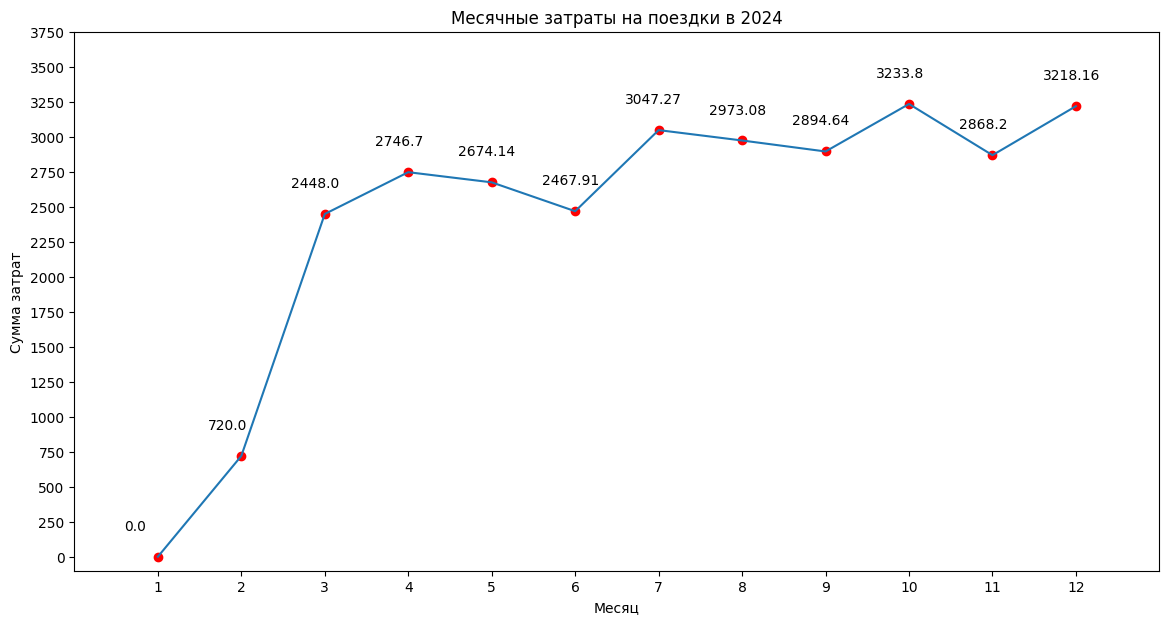

In [37]:
fig = plt.figure()

fig.set_size_inches(14, 7)
plt.plot(example.iloc[0,:12])

plt.title('Месячные затраты на поездки в 2024')
plt.ylim([-100, 2700])
plt.xlim([0, 13])
plt.yticks(np.arange(0, 3800, step=250))
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат')
plt.scatter(example.iloc[0,:12].index,example.iloc[0,:12], c='red')

for i, txt in enumerate(example.iloc[0,:12]):
    plt.annotate(round(txt,2), ((example.iloc[0,:12].index[i])-0.4, example.iloc[0,:12][i+1]+190))

plt.show()

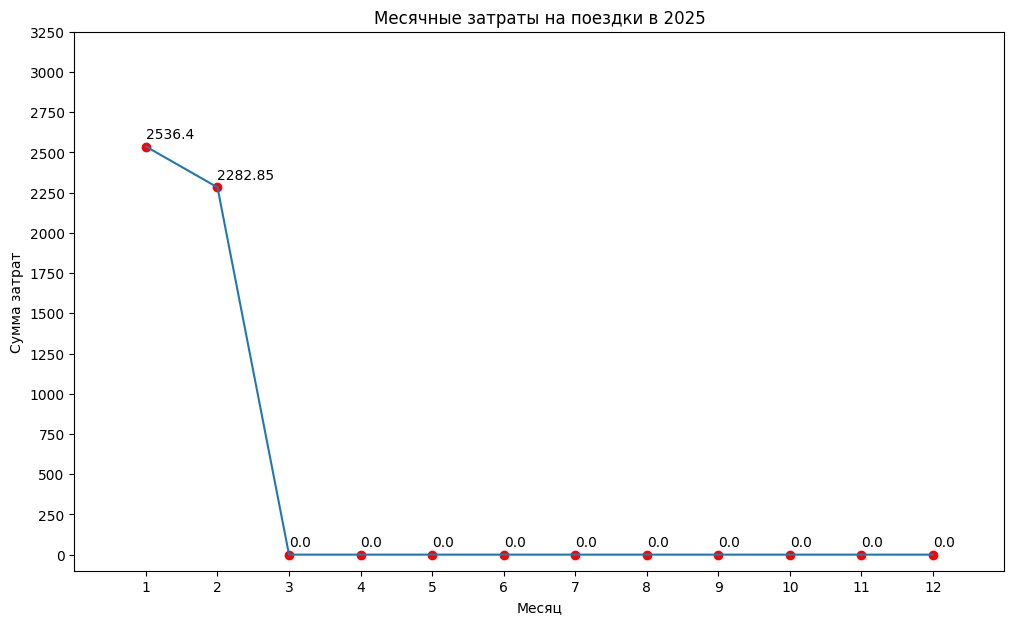

In [38]:
fig = plt.figure()

fig.set_size_inches(12, 7)
plt.plot(example.iloc[1,:12])

plt.title('Месячные затраты на поездки в 2025')
plt.ylim([-100, 2700])
plt.xlim([0, 13])
plt.yticks(np.arange(0, 3500, step=250))
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат')
plt.scatter(example.iloc[1,:12].index,example.iloc[1,:12], c='red')

for i, txt in enumerate(example.iloc[1,:12]):
    plt.annotate(round(txt,2), ((example.iloc[1,:12].index[i]), example.iloc[1,:12][i+1]+50))

plt.show()

Спланируйте расходы на бензин для ежедневных поездок из п. Половинка в г. Урай на автомобиле. Если известно:
 - расстояние м/д населёнными пунктами в км. (30 км. в одну сторону)
 - расход бензина (8 литров на 100 км.) 
 - количество поездок в месяц разное (т.к. разное количество рабочих дней.)
 - цена 1 литра бензина ( n рублей за литр.)
 - ежемесячный прогнозируемый рост цены на бензин - k% в месяц
 Рассчитайте ежемесячный   и годовой расход на бензин. Постройте график изменения цены бензина и график ежемесячных расходов.

In [39]:
price_gas = df_4.pivot_table(columns='month', index = 'year', values='gas_1l_price', aggfunc='max').fillna(0)

In [40]:
price_gas

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2024,0.00,50.00,51.0,52.02,53.06,54.12,55.2,56.31,57.43,58.58,59.75,60.95
2025,62.17,63.41,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


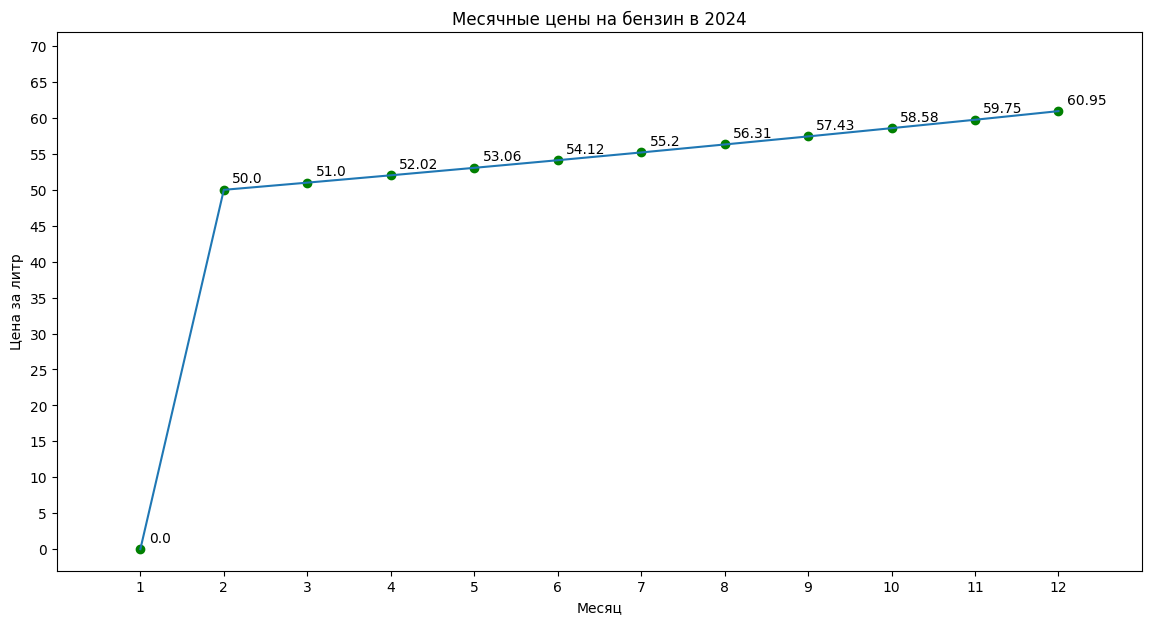

In [41]:
fig = plt.figure()

fig.set_size_inches(14, 7)
plt.plot(price_gas.iloc[0,:])

plt.title('Месячные цены на бензин в 2024')
plt.ylim([-3, 72])
plt.xlim([0, 13])
plt.yticks(np.arange(0, 72, step=5))
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Месяц')
plt.ylabel('Цена за литр')
plt.scatter(price_gas.iloc[0,:].index,price_gas.iloc[0,:], c='green')

for i, txt in enumerate(price_gas.iloc[0,:12]):
    plt.annotate(round(txt,2), ((price_gas.iloc[0,:].index[i])+0.1, price_gas.iloc[0,:][i+1]+1))

plt.show()

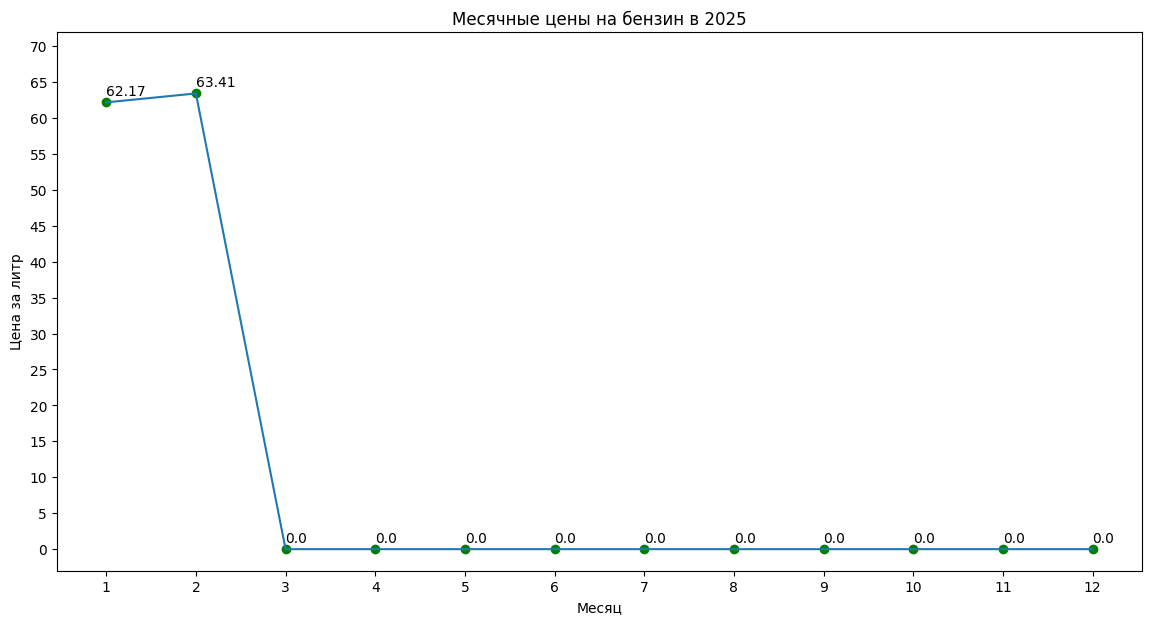

In [42]:
fig = plt.figure()

fig.set_size_inches(14, 7)
plt.plot(price_gas.iloc[1,:])

plt.title('Месячные цены на бензин в 2025')
plt.ylim([-3, 72])
plt.yticks(np.arange(0, 72, step=5))
plt.xticks(np.arange(1, 13, step=1))
plt.xlabel('Месяц')
plt.ylabel('Цена за литр')
plt.scatter(price_gas.iloc[1,:].index,price_gas.iloc[1,:], c='green')

for i, txt in enumerate(price_gas.iloc[1,:12]):
    plt.annotate(round(txt,2), ((price_gas.iloc[1,:].index[i]), price_gas.iloc[1,:][i+1]+1))

plt.show()

### задача 5

Представьте, что вы директор ресторана. Общий месячный фонд заработной платы - 10000$. На совете акционеров было установлено, что:

 - официант получает в 1,5 раза больше мойщика посуды;
 - повар - в 3 раза больше мойщика посуды;
 - шеф-повар - на 30$ больше повара;
 - завхоз - на 40$ больше официанта;
 - метрдотель - в 4 раза больше мойщика посуды;
 - управляющий - на 20$ больше метрдотеля.
 Вы должны составить штатное расписание, т.е. определить, сколько сотрудников, на каких должностях и с каким окладом нужно принять на работу.

In [43]:
total = 10000

dishwasher = 1

waiter = 1.5*dishwasher

cook = 3*dishwasher

#шеф
chef = cook+30

#завхоз
sup_manager = waiter+40

#метрдотель
headwaiter = 4*dishwasher

#управляющий
head_manager = headwaiter+20

* В ресторане 1 управляющий, 1 шеф, 1 завхоз, 1 метрдотель
* Следовательно у них наибольшая зп и отвественность, а также их всех по одному.
* Других должностей может быть больше, мы не знаем сколько, протестируем
* так как данных мало о размерах ретсорана и посещаемости нам приходится только гадать, но мы можем точно сказать, что минимум 2 официанта в смену, то есть в месяц 4. Так как полмесяца одни официанты , полмесяца другие.
* минимум 2 повара в смену, то есть в мсеяц 4
* минимум 1 мойщик посуды, то есть в месяц 2.

In [44]:
df_5 = pd.DataFrame({'salary_dishwasher':np.arange(1,400,0.5)})

In [45]:
# 2 посудомйщицы, 4 официанта , 4 повара
df_5['salary_dishwasher'] = df_5['salary_dishwasher']
df_5['salary_waiter'] = 1.5*df_5['salary_dishwasher']
df_5['salary_cook'] = 3*df_5['salary_dishwasher']

df_5['count_dishwasher'] = 2
df_5['count_waiter'] = 4
df_5['count_cook'] = 4

df_5['total_dishwasher'] = df_5['salary_dishwasher']* df_5['count_dishwasher']
df_5['total_waiter'] = df_5['salary_waiter']* df_5['count_waiter']
df_5['total_cook'] = df_5['salary_cook']* df_5['count_cook']


df_5['salary_chef'] = df_5['salary_cook'] + 30
df_5['salary_sup_manager'] = df_5['salary_waiter'] + 40
df_5['salary_headwaiter'] = 4*df_5['salary_dishwasher']
df_5['salary_head_manager'] = df_5['salary_headwaiter']+20

df_5['total'] = df_5.iloc[:,6:].sum(axis=1)

In [46]:
df_5[(df_5['total'] <= 10000)& (df_5['total'] >= 9900)]

,salary_dishwasher,salary_waiter,salary_cook,count_dishwasher,count_waiter,count_cook,total_dishwasher,total_waiter,total_cook,salary_chef,salary_sup_manager,salary_headwaiter,salary_head_manager,total
602,302.0,453.00,906.0,2,4,4,604.0,1812.0,3624.0,936.0,493.00,1208.0,1228.0,9905.00
603,302.5,453.75,907.5,2,4,4,605.0,1815.0,3630.0,937.5,493.75,1210.0,1230.0,9921.25
604,303.0,454.50,909.0,2,4,4,606.0,1818.0,3636.0,939.0,494.50,1212.0,1232.0,9937.50
605,303.5,455.25,910.5,2,4,4,607.0,1821.0,3642.0,940.5,495.25,1214.0,1234.0,9953.75
606,304.0,456.00,912.0,2,4,4,608.0,1824.0,3648.0,942.0,496.00,1216.0,1236.0,9970.00
607,304.5,456.75,913.5,2,4,4,609.0,1827.0,3654.0,943.5,496.75,1218.0,1238.0,9986.25


* внизу вывел зарплаты на 1 человека по каждой должности и общую сумму затрат на фонд труда в месяц.

In [47]:
df_5.drop(['count_dishwasher','count_waiter','count_cook'],axis=1).iloc[607]

salary_dishwasher       304.50
salary_waiter           456.75
salary_cook             913.50
total_dishwasher        609.00
total_waiter           1827.00
total_cook             3654.00
salary_chef             943.50
salary_sup_manager      496.75
salary_headwaiter      1218.00
salary_head_manager    1238.00
total                  9986.25
Name: 607, dtype: float64

### задача 9

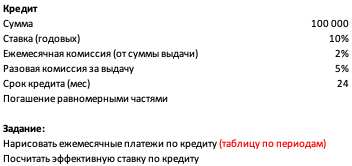о кредиту	

In [48]:
summa = 100000
percent = 0.1
month=24
fee_month=0.02
fee_first = 0.05

In [49]:
#ежемесячный платеж
total_oplata = summa*(1+0.1*month/12)
pay_per_month = total_oplata/month

#ежемесячная комиссия от суммы выдачи
pay_fee_month = summa*fee_month

#разовая комиссия за выдачу
first_fee = summa*fee_first

#постоянные ежемесячные платежи
payment = pay_per_month + pay_fee_month

#платеж первого месяца
payment_first = payment+ first_fee

In [50]:
df9 = pd.DataFrame({'month':np.arange(1,25), 'payments':payment})

In [51]:
df9.iloc[0,1] = payment_first

In [52]:
df9

,month,payments
0,1,12000.0
1,2,7000.0
2,3,7000.0
3,4,7000.0
4,5,7000.0
5,6,7000.0
6,7,7000.0
7,8,7000.0
8,9,7000.0
9,10,7000.0


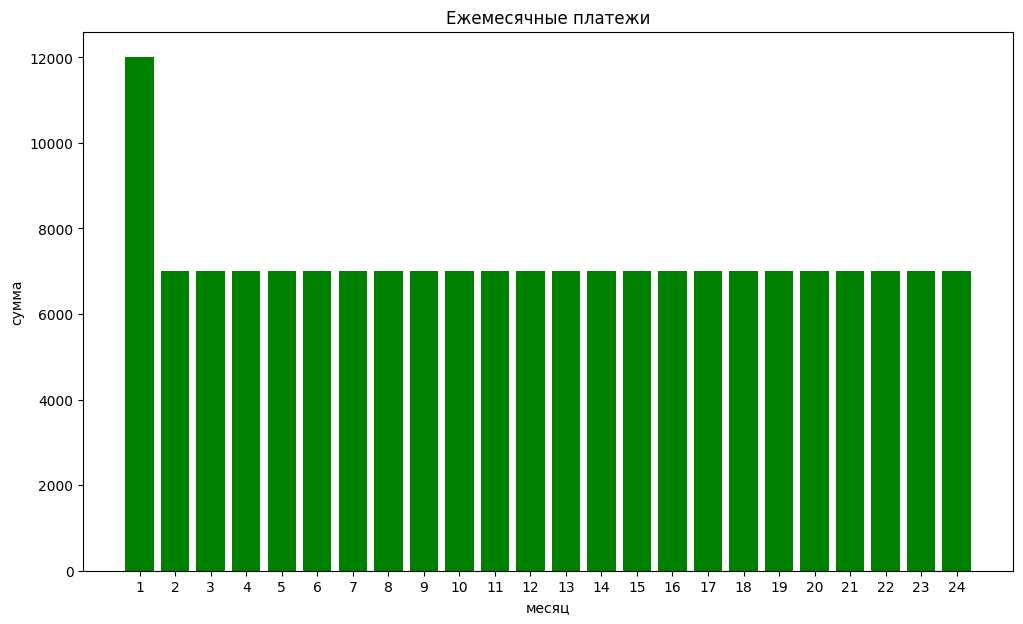

In [53]:
fig = plt.figure()

fig.set_size_inches(12, 7)

plt.bar(df9['month'],df9['payments'], color='green')


plt.title('Ежемесячные платежи')
plt.xticks(np.arange(1, 25, step=1))
plt.xlabel('месяц')
plt.ylabel('сумма')
plt.show()

In [54]:
total_pay = df9['payments'].sum()

In [55]:
f'Общая ставка по кредиту: {total_pay} рублей'

'Общая ставка по кредиту: 173000.0 рублей'

### задача 10

Необходимо привести столбец "Компания" к единому виду на русском языке. 			
Далее необходимо найти среднее значение, медиану и моду по столбцу "оборот за неделю"			
Затем посчитать суммарный оборот по каждой компании в отдельности			

In [56]:
import re

In [57]:
#для этого задания нужно скопировать путь до файла , он есть в папке , в функцию read_excel
df10 = pd.read_excel('/Users/andrejglavniy/Downloads/ubrir_Poluesov_Andrei/test_comp.xlsx')

In [58]:
#приведем к нижнему регистру
df10['Компания'] = df10['Компания'].str.lower()

In [59]:
df10['Компания'].value_counts()

Компания
krasnoe&beloe           32
mcdonalds               16
ooo magnit na frunze    16
macdonalds              16
ooo magnit              16
krasnoeibeloe           16
magnit                  16
metro fitnes            14
metro                   14
zao metro               14
krasnoe&beloe 58         2
metro 247                2
metro 244                2
krasnoe&beloe 53         2
metro 245                2
metro 243                2
krasnoe&beloe 54         2
krasnoe&beloe 57         2
metro 246                2
metro 242                2
krasnoe&beloe 59         2
krasnoe&beloe 56         2
krasnoe&beloe 55         2
metro 248                1
metro 241                1
krasnoe&beloe 52         1
krasnoe&beloe 60         1
Name: count, dtype: int64

In [60]:
def regu(x):
    if re.findall(r'krasnoe|belo',x):
        return 'Красное и белое'
    if re.findall(r'\bmetro fit',x):
        return 'Метро фитнесс'
    if re.findall(r'fit',x):
        return 'Метро фитнесс'
    if re.findall(r'metro',x):
        return 'Метро'
    if re.findall(r'mcdona|macd',x):
        return 'Вкусно и точка.'  
    if re.findall(r'magn',x):
        return 'Магнит' 
    return x

In [61]:
df10['Компания_2'] = df10['Компания'].apply(regu)

In [62]:
df10['Компания_2'].value_counts()

Компания_2
Красное и белое    64
Магнит             48
Метро              42
Вкусно и точка.    32
Метро фитнесс      14
Name: count, dtype: int64

In [63]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Компания            200 non-null    object 
 1    Оборот за неделю   200 non-null    float64
 2   Компания_2          200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [64]:

print('среднее равно:', df10[' Оборот за неделю '].mean())

среднее равно: 4913.809850000001


In [65]:
print('медиана равна:', df10[' Оборот за неделю '].median())

медиана равна: 4922.635


In [66]:
df10[' Оборот за неделю '].mode()

0        75.24
1       272.59
2       327.70
3       338.37
4       456.66
        ...   
195    9803.35
196    9834.94
197    9844.83
198    9957.96
199    9985.04
Name:  Оборот за неделю , Length: 200, dtype: float64

* моды как таковой нет.

In [67]:
total_df = df10.groupby('Компания_2').agg({' Оборот за неделю ':'sum'})\
.rename(columns={' Оборот за неделю ':'суммарная выручка'})\
.sort_values('суммарная выручка', ascending=False)


In [68]:
total_df

,суммарная выручка
Компания_2,
Красное и белое,308735.89
Магнит,219337.58
Метро,218145.32
Вкусно и точка.,162764.23
Метро фитнесс,73778.95


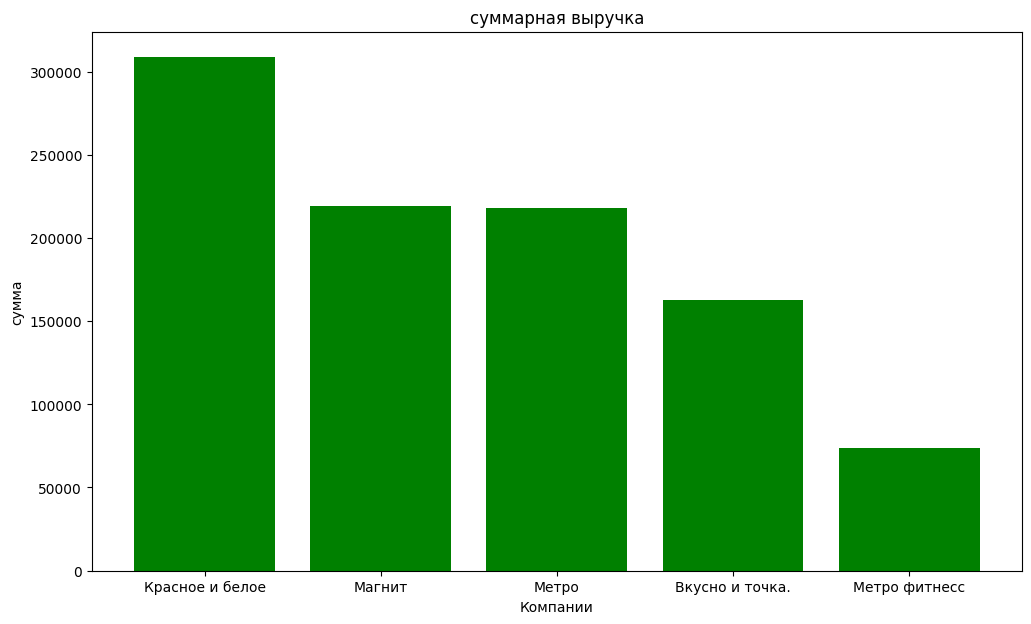

In [69]:
fig = plt.figure()

fig.set_size_inches(12, 7)

plt.bar(total_df.index,total_df['суммарная выручка'], color='green')


plt.title('суммарная выручка')

plt.xlabel('Компании')
plt.ylabel('сумма')


plt.show()
plt.show()